# Recurrent Neural Network

In [ ]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [ ]:
(x_train,y_train),(x_test,y_test)=imdb.load_data( num_words=10000)

In [ ]:
x_train.shape

(25000,)

In [ ]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

The data is already integer encoded

In [ ]:
x_train=pad_sequences(x_train,padding='post',maxlen=50)
x_test=pad_sequences(x_test,padding='post',maxlen=50)

In [ ]:
x_train

array([[2071,   56,   26, ...,   19,  178,   32],
       [8255,    5,    2, ...,   16,  145,   95],
       [ 215,   28,  610, ...,    7,  129,  113],
       ...,
       [   4,   65,  496, ...,    4, 3586,    2],
       [  13,   18,   31, ...,   12,    9,   23],
       [7585,    8, 2197, ...,  204,  131,    9]])

In [ ]:
model=Sequential()
model.add(Embedding(10000,2,input_length=50))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 2)             20000     
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                1120      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21153 (82.63 KB)
Trainable params: 21153 (82.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])


In [ ]:
h=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 9s 15ms/step - loss: 0.2128 - acc: 0.9226 - val_loss: 0.5590 - val_acc: 0.7858
Epoch 2/10
625/625 [==============================] - 13s 21ms/step - loss: 0.1955 - acc: 0.9307 - val_loss: 0.5854 - val_acc: 0.7856
Epoch 3/10
625/625 [==============================] - 11s 17ms/step - loss: 0.1837 - acc: 0.9344 - val_loss: 0.5918 - val_acc: 0.7818
Epoch 4/10
625/625 [==============================] - 12s 18ms/step - loss: 0.1658 - acc: 0.9420 - val_loss: 0.6394 - val_acc: 0.7790
Epoch 5/10
625/625 [==============================] - 12s 19ms/step - loss: 0.1524 - acc: 0.9482 - val_loss: 0.6614 - val_acc: 0.7792
Epoch 6/10
625/625 [==============================] - 11s 18ms/step - loss: 0.1469 - acc: 0.9493 - val_loss: 0.7129 - val_acc: 0.7700
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 0.1269 - acc: 0.9578 - val_loss: 0.7310 - val_acc: 0.7712
Epoch 8/10
625/625 [==============================] - 9s 15ms/st

In [ ]:
import matplotlib.pyplot as plt
acc=h.history['acc']
val_acc=h.history['val_acc']
loss=h.history['loss']
val_loss=h.history['val_loss']

In [ ]:
epoch=range(1,11)

<Figure size 640x480 with 0 Axes>

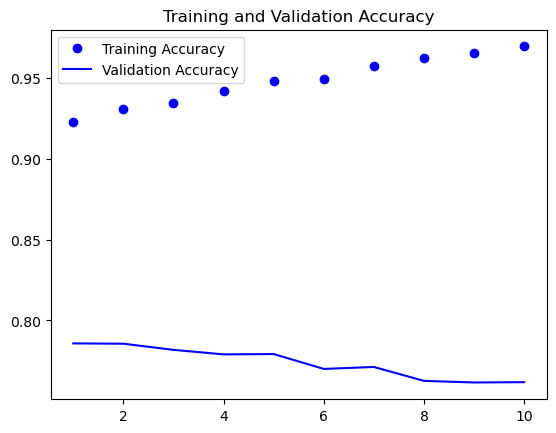

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epoch,acc,'bo',label='Training Accuracy')
plt.plot(epoch,val_acc,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

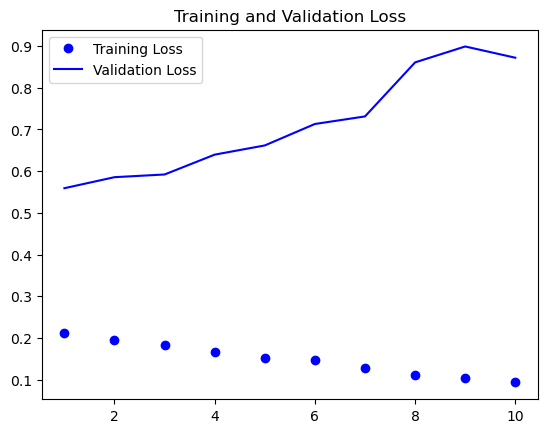

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epoch,loss,'bo',label='Training Loss')
plt.plot(epoch,val_loss,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.figure()

# LSTM(Long Short Term Memory)

In [ ]:
from keras.layers import LSTM
model=Sequential()
model.add(Embedding(10000,32,input_length=50))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 50, 32)            320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
h=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 12s 46ms/step - loss: 0.5358 - acc: 0.7268 - val_loss: 0.4272 - val_acc: 0.8020
Epoch 2/10
157/157 [==============================] - 9s 58ms/step - loss: 0.3423 - acc: 0.8530 - val_loss: 0.4182 - val_acc: 0.8088
Epoch 3/10
157/157 [==============================] - 7s 44ms/step - loss: 0.2775 - acc: 0.8898 - val_loss: 0.4496 - val_acc: 0.7956
Epoch 4/10
157/157 [==============================] - 6s 40ms/step - loss: 0.2362 - acc: 0.9094 - val_loss: 0.5038 - val_acc: 0.7892
Epoch 5/10
157/157 [==============================] - 7s 47ms/step - loss: 0.2032 - acc: 0.9247 - val_loss: 0.5640 - val_acc: 0.7828
Epoch 6/10
157/157 [==============================] - 10s 62ms/step - loss: 0.1790 - acc: 0.9359 - val_loss: 0.5693 - val_acc: 0.7844
Epoch 7/10
157/157 [==============================] - 7s 42ms/step - loss: 0.1502 - acc: 0.9476 - val_loss: 0.6673 - val_acc: 0.7790
Epoch 8/10
157/157 [==============================] - 7s 45ms/step 

In [ ]:
acc=h.history['acc']
val_acc=h.history['val_acc']
loss=h.history['loss']
val_loss=h.history['val_loss']

<Figure size 640x480 with 0 Axes>

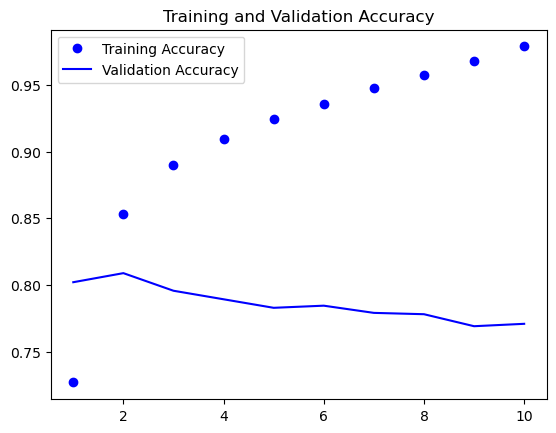

<Figure size 640x480 with 0 Axes>

In [ ]:
epoch=range(1,11)
plt.plot(epoch,acc,'bo',label='Training Accuracy')
plt.plot(epoch,val_acc,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

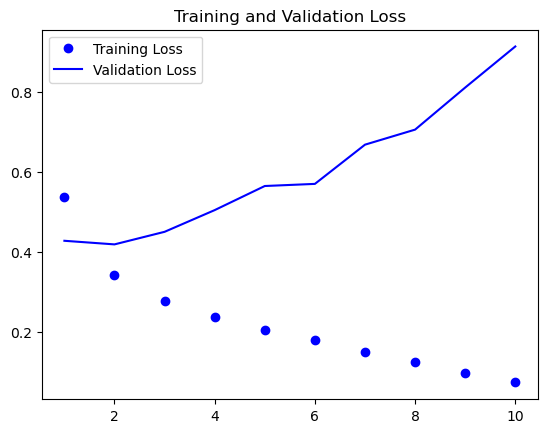

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epoch,loss,'bo',label='Training Loss')
plt.plot(epoch,val_loss,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.figure()

# Gated Recurrent Unit(GRU)

In [ ]:
from keras.layers import GRU
model=Sequential()
model.add(Embedding(10000,32,input_length=50))
model.add(GRU(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 50, 32)            320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326369 (1.24 MB)
Trainable params: 326369 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
h=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 10s 41ms/step - loss: 0.5522 - acc: 0.7002 - val_loss: 0.4256 - val_acc: 0.8022
Epoch 2/10
157/157 [==============================] - 8s 48ms/step - loss: 0.3408 - acc: 0.8545 - val_loss: 0.4243 - val_acc: 0.8040
Epoch 3/10
157/157 [==============================] - 7s 44ms/step - loss: 0.2700 - acc: 0.8914 - val_loss: 0.4542 - val_acc: 0.7944
Epoch 4/10
157/157 [==============================] - 7s 45ms/step - loss: 0.2281 - acc: 0.9123 - val_loss: 0.5005 - val_acc: 0.7924
Epoch 5/10
157/157 [==============================] - 6s 37ms/step - loss: 0.1896 - acc: 0.9309 - val_loss: 0.5868 - val_acc: 0.7864
Epoch 6/10
157/157 [==============================] - 7s 45ms/step - loss: 0.1528 - acc: 0.9484 - val_loss: 0.6013 - val_acc: 0.7836
Epoch 7/10
157/157 [==============================] - 6s 39ms/step - loss: 0.1276 - acc: 0.9575 - val_loss: 0.6907 - val_acc: 0.7856
Epoch 8/10
157/157 [==============================] - 6s 40ms/step -

<Figure size 640x480 with 0 Axes>

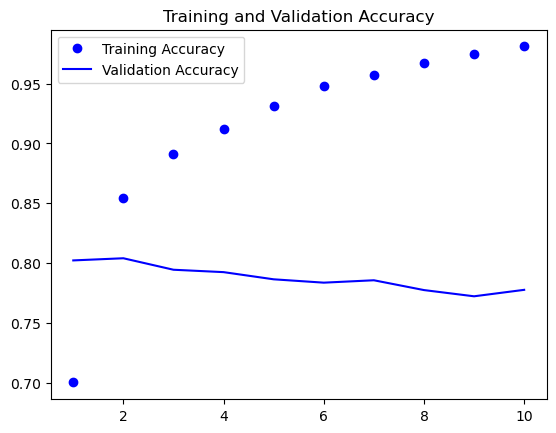

<Figure size 640x480 with 0 Axes>

In [ ]:
acc=h.history['acc']
val_acc=h.history['val_acc']
loss=h.history['loss']
val_loss=h.history['val_loss']
epoch=range(1,11)
plt.plot(epoch,acc,'bo',label='Training Accuracy')
plt.plot(epoch,val_acc,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

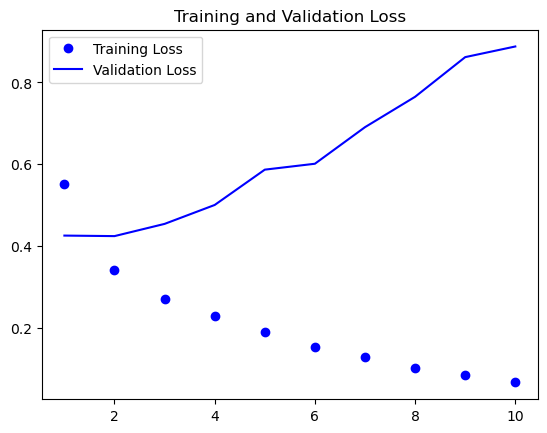

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epoch,loss,'bo',label='Training Loss')
plt.plot(epoch,val_loss,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.figure()

# Reversing the Sequences of string

In [ ]:
(X_train,Y_train),(X_test,Y_test)=imdb.load_data( num_words=10000)

In [ ]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
X_train=[x[::-1] for x in X_train]
X_test=[x[::-1] for x in X_test]

In [ ]:
X_train

[[32,
  178,
  19,
  5345,
  16,
  15,
  32,
  103,
  113,
  4472,
  16,
  5,
  283,
  16,
  12,
  88,
  1334,
  38,
  16,
  65,
  226,
  4,
  104,
  25,
  92,
  224,
  28,
  36,
  51,
  18,
  5535,
  30,
  144,
  5,
  480,
  26,
  476,
  134,
  21,
  22,
  226,
  4,
  18,
  7486,
  194,
  6,
  141,
  26,
  56,
  2071,
  32,
  98,
  297,
  15,
  381,
  4,
  88,
  104,
  13,
  1029,
  2,
  4,
  7,
  46,
  317,
  400,
  26,
  476,
  530,
  43,
  71,
  36,
  723,
  5,
  3766,
  7,
  2,
  4,
  256,
  15,
  5952,
  117,
  107,
  4,
  8,
  2,
  82,
  16,
  407,
  14,
  5,
  52,
  77,
  28,
  215,
  12,
  22,
  6,
  33,
  1415,
  25,
  48,
  135,
  36,
  51,
  124,
  25,
  5,
  619,
  38,
  16,
  12,
  130,
  4,
  33,
  3785,
  66,
  480,
  16,
  5244,
  2223,
  4,
  5,
  106,
  8,
  316,
  8,
  12,
  386,
  62,
  5,
  2,
  18,
  626,
  16,
  12,
  17,
  515,
  17,
  22,
  4,
  1247,
  13,
  15,
  76,
  38,
  530,
  43,
  16,
  12,
  87,
  71,
  22,
  4,
  469,
  4613,
  1920,
  4,
  22,
  14

In [ ]:
X_train=pad_sequences(X_train,padding='post',maxlen=500)
X_test=pad_sequences(X_test,padding='post',maxlen=500)

In [ ]:
from keras.layers import LSTM
model=Sequential()
model.add(Embedding(10000,128,input_length=500))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1300641 (4.96 MB)
Trainable params: 1300641 (4.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
h=model.fit(X_train,Y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 91s 555ms/step - loss: 0.6931 - acc: 0.5077 - val_loss: 0.6936 - val_acc: 0.5036
Epoch 2/10
157/157 [==============================] - 86s 550ms/step - loss: 0.6850 - acc: 0.5192 - val_loss: 0.7013 - val_acc: 0.5188
Epoch 3/10
157/157 [==============================] - 84s 537ms/step - loss: 0.6565 - acc: 0.5399 - val_loss: 0.7069 - val_acc: 0.5062
Epoch 4/10
157/157 [==============================] - 85s 544ms/step - loss: 0.6397 - acc: 0.5369 - val_loss: 0.7446 - val_acc: 0.5170
Epoch 5/10
157/157 [==============================] - 86s 550ms/step - loss: 0.6347 - acc: 0.5425 - val_loss: 0.7490 - val_acc: 0.5150
Epoch 6/10
157/157 [==============================] - 85s 542ms/step - loss: 0.6326 - acc: 0.5459 - val_loss: 0.7756 - val_acc: 0.5062
Epoch 7/10
157/157 [==============================] - 87s 557ms/step - loss: 0.6320 - acc: 0.5483 - val_loss: 0.7736 - val_acc: 0.5132
Epoch 8/10
157/157 [==============================] - 2

<Figure size 640x480 with 0 Axes>

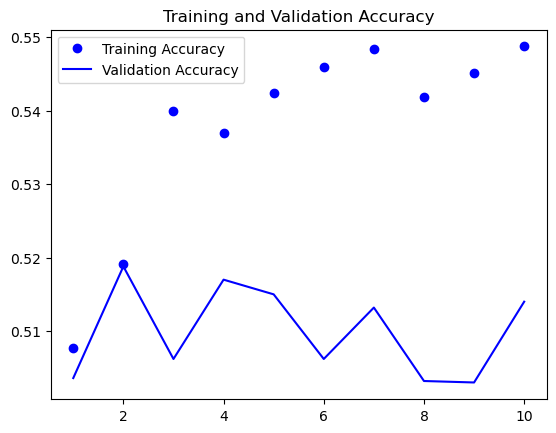

<Figure size 640x480 with 0 Axes>

In [ ]:
acc=h.history['acc']
val_acc=h.history['val_acc']
loss=h.history['loss']
val_loss=h.history['val_loss']
epoch=range(1,11)
plt.plot(epoch,acc,'bo',label='Training Accuracy')
plt.plot(epoch,val_acc,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

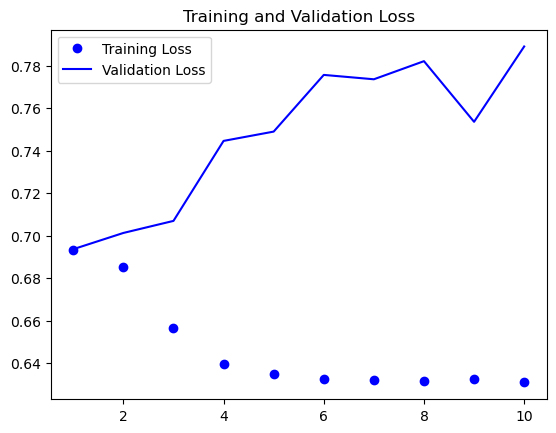

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epoch,loss,'bo',label='Training Loss')
plt.plot(epoch,val_loss,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.figure()

# Bi Directional RNN

In [ ]:
from keras.layers import Bidirectional
model=Sequential()
model.add(Embedding(10000,32,input_length=50))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 50, 32)            320000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
h=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 12s 53ms/step - loss: 0.5308 - acc: 0.7121 - val_loss: 0.4276 - val_acc: 0.7982
Epoch 2/10
157/157 [==============================] - 7s 47ms/step - loss: 0.3299 - acc: 0.8626 - val_loss: 0.4376 - val_acc: 0.7990
Epoch 3/10
157/157 [==============================] - 8s 50ms/step - loss: 0.2568 - acc: 0.9010 - val_loss: 0.4381 - val_acc: 0.8000
Epoch 4/10
157/157 [==============================] - 8s 49ms/step - loss: 0.1941 - acc: 0.9288 - val_loss: 0.5589 - val_acc: 0.7804
Epoch 5/10
157/157 [==============================] - 8s 50ms/step - loss: 0.1535 - acc: 0.9455 - val_loss: 0.7346 - val_acc: 0.7614
Epoch 6/10
157/157 [==============================] - 8s 52ms/step - loss: 0.1227 - acc: 0.9567 - val_loss: 0.7424 - val_acc: 0.7744
Epoch 7/10
157/157 [==============================] - 8s 50ms/step - loss: 0.0913 - acc: 0.9693 - val_loss: 0.8758 - val_acc: 0.7700
Epoch 8/10
157/157 [==============================] - 8s 54ms/step -

<Figure size 640x480 with 0 Axes>

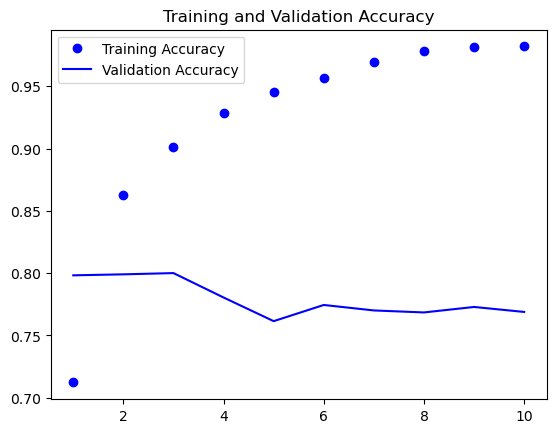

<Figure size 640x480 with 0 Axes>

In [ ]:
acc=h.history['acc']
val_acc=h.history['val_acc']
loss=h.history['loss']
val_loss=h.history['val_loss']
epoch=range(1,11)
plt.plot(epoch,acc,'bo',label='Training Accuracy')
plt.plot(epoch,val_acc,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

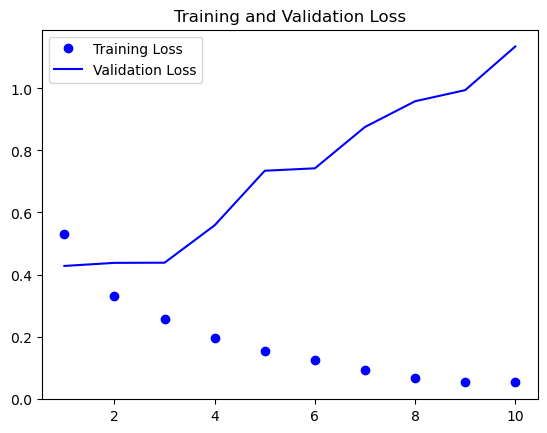

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epoch,loss,'bo',label='Training Loss')
plt.plot(epoch,val_loss,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.figure()